# Continuous Optimisation

Since machine learning algorithms are implemented on a computer, the
mathematical formulations are expressed as numerical optimization methods.
This chapter describes the basic numerical methods for training machine
learning models. Training a machine learning model often boils
down to finding a good set of parameters. The notion of "good" is determined
by the objective function or the probabilistic model. Given an objective
function, finding the best value is done using optimization algorithms.

This notebook covers two main branches of continuous optimization unconstrained and constrained optimization.
We will assume in
this chapter that our objective function is differentiable, hence we have access to a gradient at each location in the space to help us
find the optimum value. By convention, most objective functions in machine
learning are intended to be minimized, that is, the best value is the
minimum value. Intuitively finding the best value is like finding the valleys
of the objective function, and the gradients point us uphill. The idea is
to move downhill (opposite to the gradient) and hope to find the deepest
point. For unconstrained optimization, this is the only concept we need,
but there are several design choices. For
constrained optimization, we need to introduce other concepts to manage
the constraints. We will also introduce a special class
of problems (convex optimization problems) where we can
make statements about reaching the global optimum.

Consider the function below. The function has a global minimum around $x = -4.5$, with a function value of approximately $-47$. Since
the function is "smooth," the gradients can be used to help find the minimum
by indicating whether we should take a step to the right or left.

This assumes that we are in the correct bowl, as there exists another local local minimum
minimum around $x = 0.7$. Recall that we can solve for all the stationary
points of a function by calculating its derivative and setting it to zero.

**Stationary points are the real roots of the derivative, that is, points that have zero gradient.**

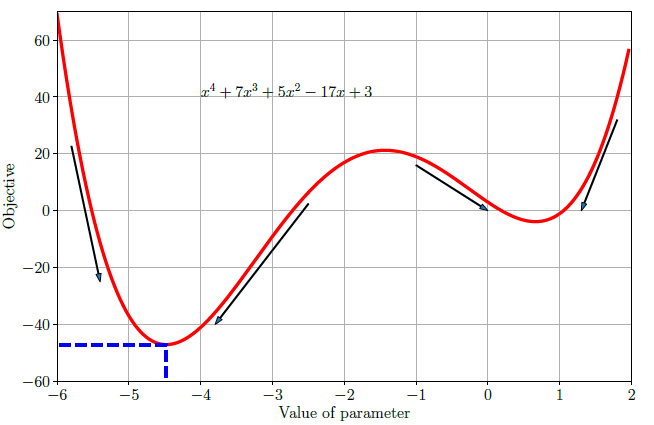

_Example objective function. Negative gradients are indicated by arrows, and the global minimum is indicated by the dashed blue line._

For the equation in the figure above:

\begin{equation}
\ell(x) = x^4 + 7x^3 + 5x^2 - 17x + 3
\end{equation}

we obtain the corresponding gradient as

\begin{equation}
\frac{d\ell(x)}{dx} = 4x^3 + 21x^2 - 10x - 17
\end{equation}

Since this is a cubic equation, it has in general three solutions when set to
zero. In the example, two of them are minimums and one is a maximum
(around $x = -1.4$). To check whether a stationary point is a minimum
or maximum, we need to take the derivative a second time and check
whether the second derivative is positive or negative at the stationary
point. In our case, the second derivative is

\begin{equation}
\frac{d^2\ell(x)}{dx^2} = 12x^2 + 42x + 10
\end{equation}

Note that we have avoided analytically solving for values of x in the
previous discussion, although for low-order polynomials such as the preceding
we could do so. In general, we are unable to find analytic solutions,
and hence we need to start at some value, say $x_0 = -6$, and follow
the negative gradient. The negative gradient indicates that we should go
right, but not how far (this is called the step-size). Furthermore, if we
had started at the right side (e.g., $x_0 = 0$) the negative gradient would
have led us to the wrong minimum. The figure above illustrates the fact that for
$x > -1$, the negative gradient points toward the minimum on the right of
the figure, which has a larger objective value.

Convex functions, that do not exhibit this tricky dependency on the starting point
of the optimization algorithm. For convex functions, all local minimums
are global minimum. It turns out that many machine learning objective
functions are designed such that they are convex.

[Worked through gradient calculation](https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html)

## Optimisation Using Gradient Descent

We now consider the problem of solving for the minimum of a real-valued function

\begin{equation}
\mathop{min}_{\textbf{x}}\ f(x)
\end{equation}

where $f : \mathbb{R}^d \rightarrow \mathbb{R}$ is an objective function that captures the machine learning problem at hand. We assume that our function f is differentiable, and we are unable to analytically find a solution in closed form.

Gradient descent is a first-order optimization algorithm. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Recall that the gradient points in the direction of the steepest ascent. Another useful intuition is to consider the set of lines where the function is at a certain value($f(x)=c\ \text{for some value}\ c \in \mathbb{R}$) which are known as the contour lines. The gradient points in a direction that is orthogonal to the contour lines of the function we wish to optimize. Let us consider multivariate functions. Imagine a surface (described by the function $f(x)$) with a ball starting at a particular location $x_0$. When the ball is released, it will move downhill in the direction of steepest descent. Gradient descent exploits the fact that $f(x_0)$ decreases fastest if one moves from $x_0$ in the direction of the negative gradient $-((\triangledown f)(x_0))^\top$ of $f$ at $x_0$. Then if:

\begin{equation}
x_1 = x_0 - \gamma((\triangledown f)(x_0))^\top
\end{equation}

for a small step-size $\gamma \geqslant 0$, then $f(x_1)\leqslant f(x_0$). Note that we use the transpose for the gradient since otherwise the dimensions will not work out.

This observation allows us to define a simple gradient descent algorithm: If we want to find a local optimum $f(x_∗)$ of a function $f : \mathbb{R}^n \rightarrow \mathbb{R}, x \rightarrow f(x)$, we start with an initial guess $x_0$ of the parameters we wish to optimize and then iterate according to

\begin{equation}
x_{i+1} = x_i - \gamma_i((\triangledown f)(x_i))^\top
\end{equation}

For suitable step-size $\gamma_i$, the sequence $f(x_0) \geqslant f(x_1) \geqslant ...$ converges to a local minimum.


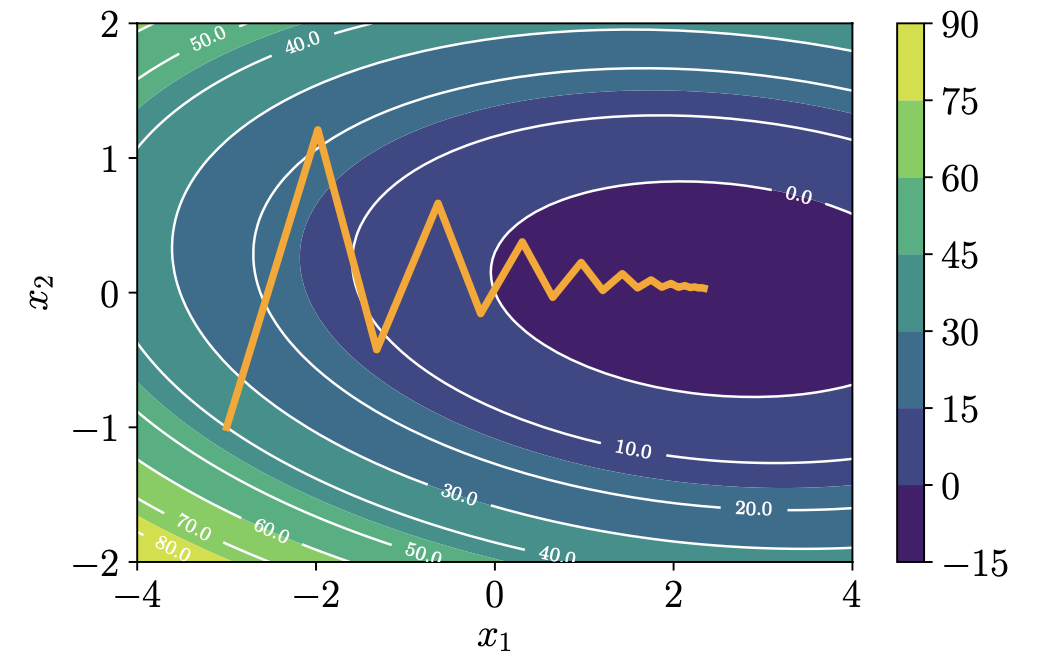

_Gradient descent on a two-dimensional quadratic surface (shown as a heatmap)_

Gradient descent can be relatively slow close to the minimum: Its asymptotic rate of convergence is inferior to many other methods. Using the ball rolling down the hill analogy, when the surface is a long, thin valley, the problem is poorly conditioned. For poorly conditioned convex problems, gradient descent increasingly "zigzags" as the gradients point nearly orthogonally to the shortest direction to a minimum point

### Step-size

As mentioned earlier, choosing a good step-size is important in gradient descent. If the step-size is too small, gradient descent can be slow. If the step-size is chosen too large, gradient descent can overshoot, fail to converge, or even diverge. We will discuss the use of momentum in the next section. It is a method that smoothes out erratic behavior of gradient up- dates and dampens oscillations.

Adaptive gradient methods rescale the step-size at each iteration, depending on local properties of the function. There are two simple heuristics:
- When the function value increases after a gradient step, the step-size was too large. Undo the step and decrease the step-size.
- When the function value decreases the step could have been larger. Try to increase the step-size.

### Gradient Descent With Momentum

The convergence of gradient descent may be very slow if the curvature of the optimization surface is such that there are regions that are poorly scaled. The curvature is such that the gradient descent steps hops between the walls of the valley and approaches the optimum in small steps. The proposed tweak to improve convergence is to give gradient descent some memory.

Gradient descent with momentum is a method that introduces an additional term to remember what happened in the previous iteration. This memory dampens oscillations and smoothes out the gradient updates. Continuing the ball analogy, the momentum term emulates the phenomenon of a heavy ball that is reluctant to change directions. The idea is to have a gradient update with memory to implementa moving average. The momentum-based method remembers the update $\triangle x_i$ at each iteration $i$ and determines the next update as a linear combination of the current and previous gradients

\begin{equation}
x_{i+1} = x_i - \gamma_i((\triangledown f)(x_i))^\top + \alpha \triangle x_i \\
\triangle x_i = x_i - x_{i-1} = \alpha \triangle x_{i-1} - \gamma_{i-1}((\triangledown f)(x_{i-1}))^\top
\end{equation}

where $\alpha \in [0, 1]$. Sometimes we will only know the gradient approximately. In such cases, the momentum term is useful since it averages out different noisy estimates of the gradient. One particularly useful way to obtain an approximate gradient is by using a stochastic approximation.

### Stochastic Gradient Descent

Computing the gradient can be very time consuming. However, often it is possible to find a "cheap" approximation of the gradient. Approximating the gradient is still useful as long as it points in roughly the same direction as the true gradient.

Stochastic gradient descent (often shortened as SGD) is a stochastic approximation of the gradient descent method for minimizing an objective function that is written as a sum of differentiable functions. The word stochastic here refers to the fact that we acknowledge that we do not know the gradient precisely, but instead only know a noisy approximation to it. By constraining the probability distribution of the approximate gradients, we can still theoretically guarantee that SGD will converge.

In machine learning, given $n = 1, ... , N$ data points, we often consider objective functions that are the sum of the losses $L_n$ incurred by each example $n$. In mathematical notation, we have the form:

\begin{equation}
L(\theta) = \sum^N_{n=1}L_n(\theta)
\end{equation}

where $\theta$ is the vector of parameters of interest, i.e., we want to find $\theta$ that minimizes $L$.

Standard gradient descent, as introduced previously, is a "batch" optimization method, i.e., optimization is performed using the full training set by updating the vector of parameters according to:

\begin{equation}
\theta_{i+1} = \theta_i - \gamma_i(\triangledown L(\theta_i))^\top = \theta_i - \gamma_i \sum^N_{n=1}(\triangledown L_n (\theta_i))^\top
\end{equation}

for a suitable step-size parameter $\gamma_i$. Evaluating the sum gradient may require expensive evaluations of the gradients from all individual functions $L_n$. When the training set is enormous and/or no simple formulas exist, evaluating the sums of gradients becomes very expensive.

Consider the term $\sum^N_{n=1}(\triangledown L_n (\theta_i))$ we can reduce the amount of computation by taking a sum over a smaller set of $L_n$. In contrast to batch gradient descent, which uses all $L_n for n = 1, ... , N$ , we randomly choose a subset of $L_n$ for mini-batch gradient descent. The key insight about why taking a subset of data is sensible is to realize that for gradient descent to converge, we only require that the gradient is an unbiased estimate of the true gradient.

When the learning rate decreases at an appropriate rate, and subject to relatively mild assumptions, stochastic gradient descent converges almost surely to local minimum.

Why should one consider using an approximate gradient? A major reason is practical implementation constraints, such as the size of central processing unit (CPU)/graphics processing unit (GPU) memory or limits on computational time. We can think of the size of the subset used to estimate the gradient in the same way that we thought of the size of a sample when estimating empirical means.  Large mini-batch sizes will provide accurate estimates of the gradient, reducing the variance in the parameter update. Furthermore, large mini-batches take advantage of highly optimized matrix operations in vectorized implementations of the cost and gradient. The reduction in variance leads to more stable convergence, but each gradient calculation will be more expensive.

In contrast, small mini-batches are quick to estimate. If we keep the mini-batch size small, the noise in our gradient estimate will allow us to get out of some bad local optima, which we may otherwise get stuck in. In machine learning, optimization methods are used for training by minimizing an objective function on the training data, but the overall goal is to improve generalization performance. Since the goal in machine learning does not necessarily need a precise estimate of the minimum of the objective function, approximate gradients using mini-batch approaches have been widely used. Stochastic gradient descent is very effective in large-scale machine learning problems.

## Constrained Optimization and Lagrange Multipliers

In this section, we add additional constraints to solving the minimum of a function. That is, for real-valued functions $g_i : \mathbb{R}^D \rightarrow \mathbb{R} \text{for i = 1}, ..., m$, we consider the constrained optimization problem:

\begin{equation}
\mathop{min}_{\textbf{x}} f(x)\\
\text{subject to}\ g_i(x) \leqslant 0\ \text{for all}\ i=1,\cdots,m
\end{equation}

It is worth pointing out that the functions $f$ and $g_i$ could be non-convex in general, and we will consider the convex case in the next section.

One obvious, but not very practical, way of converting the constrained problem into an unconstrained one is to use an indicator function:

\begin{equation}
J(x) = f(x) + \sum_{i=1}^m 1(g_i(x))
\end{equation}

where $1(z)$ is an infinite step function

\begin{equation}
    1(z) =
    \begin{cases}
      0\ \text{if}\ z \leqslant 0\\
      \infty\ \text{otherwise}
    \end{cases} 
\end{equation}

This gives infinite penalty if the constraint is not satisfied, and hence would provide the same solution. However, this infinite step function is equally difficult to optimize. We can overcome this difficulty by introduc- ing Lagrange multipliers. The idea of Lagrange multipliers is to replace the step function with a linear function.

## Convex Optimization

We focus our attention of a particularly useful class of optimization prob- lems, where we can guarantee global optimality.

Convex sets are sets such that a straight line connecting any two ele- ments of the set lie inside the set. Convex functions are functions such that a straight line between any two points of the function lie above the function. The 1st figure in this notebook shows a non-convex function. A convex function is shown below:

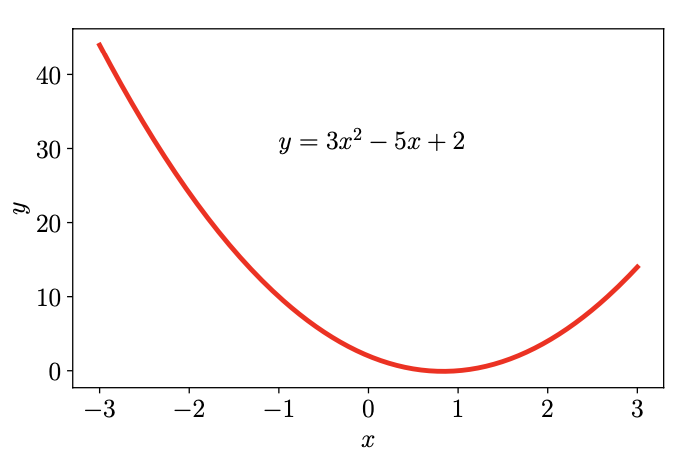

A function $f(x)$ is convex if and only if for any two points $x$, $y$ it holds that

\begin{equation}
f(y) \geqslant f(x) + \triangledown_x f(x)^{\top}(y-x)
\end{equation}


In [ ]:
\mathbb{R}
\mathbb{E}